In [36]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings 
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",category=Warning)

In [37]:
data=pd.read_csv('autompg.csv')
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [38]:
data.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
origin            3
car name        305
dtype: int64

In [39]:
data.drop('car name',axis=1,inplace=True)

In [40]:
data.shape

(398, 8)

In [41]:
data[data['horsepower']=='?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,?,2046,19.0,71,1
126,21.0,6,200.0,?,2875,17.0,74,1
330,40.9,4,85.0,?,1835,17.3,80,2
336,23.6,4,140.0,?,2905,14.3,80,1
354,34.5,4,100.0,?,2320,15.8,81,2
374,23.0,4,151.0,?,3035,20.5,82,1


In [42]:
data=data[data['horsepower']!="?"]

In [43]:
data['horsepower']=data['horsepower'].astype(float)

In [44]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [45]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


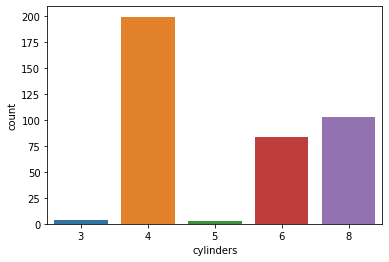

In [46]:
sns.countplot(data.cylinders,data=data);

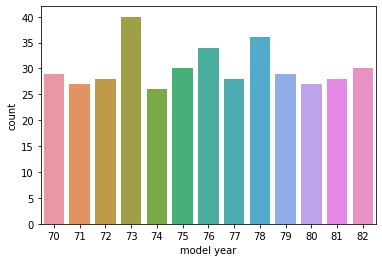

In [47]:
sns.countplot(data['model year'],data=data);

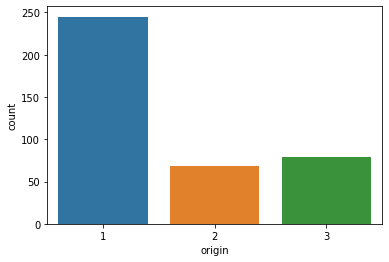

In [48]:
sns.countplot(data.origin,data=data);

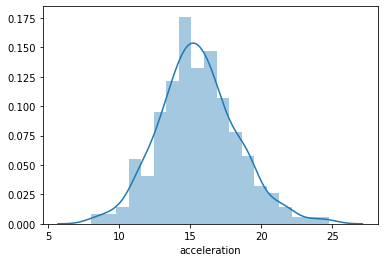

In [49]:
sns.distplot(data['acceleration']);

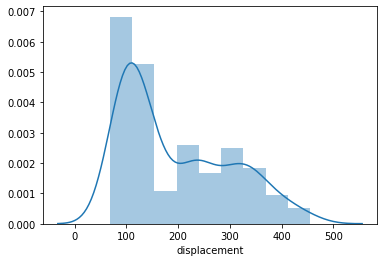

In [50]:
sns.distplot(data['displacement']);

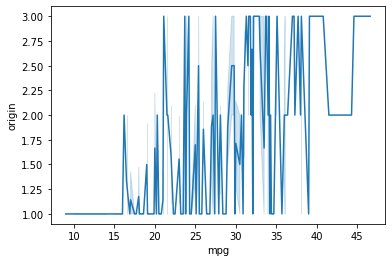

In [51]:
sns.lineplot(x='mpg',y='origin',data=data);

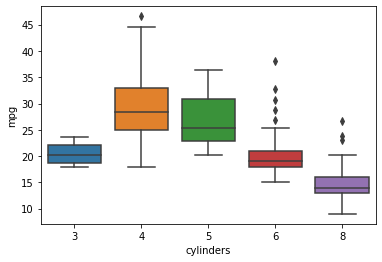

In [52]:
sns.boxplot(y='mpg',x='cylinders',data=data)


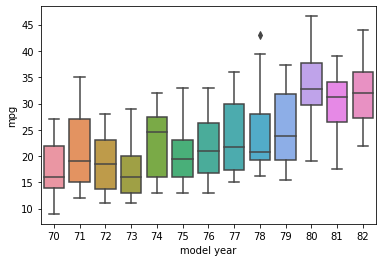

In [53]:
sns.boxplot(y='mpg',x='model year',data=data);



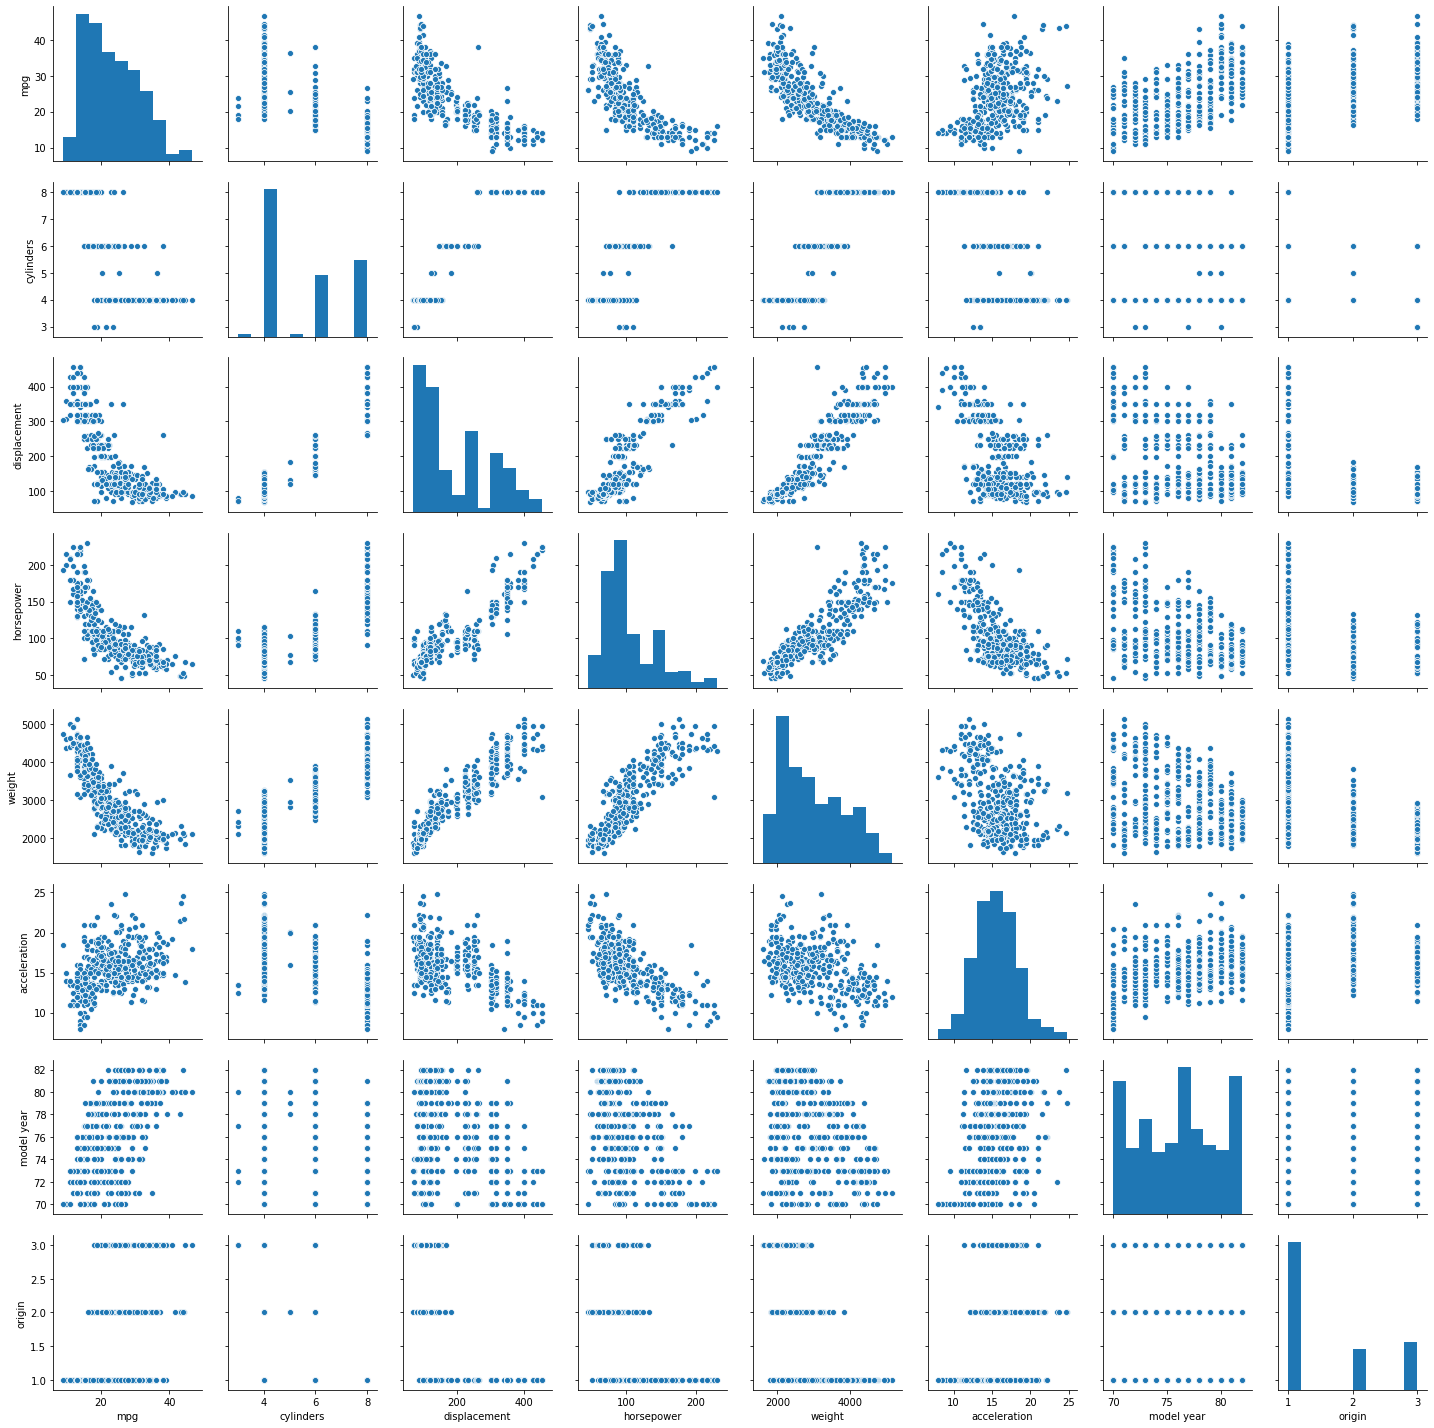

In [54]:
sns.pairplot(data);

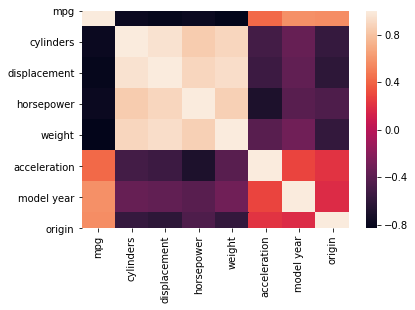

In [11]:
sns.heatmap(data.corr());

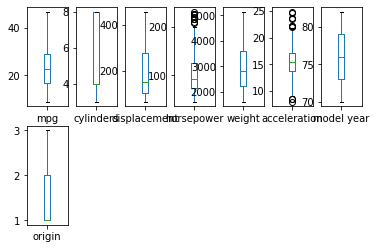

In [12]:
data.plot(kind='box',subplots=True,layout=(2,7));

In [13]:
from scipy.stats import zscore
z_score=abs(zscore(data))
print(data.shape)
data_final=data.loc[(z_score<3).all(axis=1)]
print(data_final.shape)

(392, 8)
(385, 8)


In [14]:
data_final=data
data.shape

(392, 8)

In [15]:
data.skew()

mpg             0.457092
cylinders       0.508109
displacement    0.701669
horsepower      1.087326
weight          0.519586
acceleration    0.291587
model year      0.019688
origin          0.915185
dtype: float64

In [16]:
for col in data.columns:
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

In [17]:
data.skew()

mpg             0.457092
cylinders       0.508109
displacement    0.214231
horsepower      0.377557
weight          0.519586
acceleration    0.291587
model year      0.019688
origin          0.790401
dtype: float64

In [18]:
df_x=data.drop('mpg',axis=1)
y=data['mpg']
df_x.shape,y.shape

((392, 7), (392,))

In [19]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
ss=MinMaxScaler()
x=ss.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,1.0,0.792207,0.643766,0.536150,0.238095,0.0,0.000000
1,1.0,0.861413,0.792479,0.589736,0.208333,0.0,0.000000
2,1.0,0.810790,0.732999,0.516870,0.178571,0.0,0.000000
3,1.0,0.787024,0.732999,0.516019,0.238095,0.0,0.000000
4,1.0,0.783540,0.689966,0.520556,0.148810,0.0,0.000000
...,...,...,...,...,...,...,...
387,0.2,0.378447,0.386719,0.333711,0.452381,1.0,0.000000
388,0.2,0.185799,0.075455,0.146583,0.988095,1.0,0.584963
389,0.2,0.359327,0.372113,0.193365,0.214286,1.0,0.000000
390,0.2,0.297441,0.334038,0.286929,0.630952,1.0,0.000000


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [21]:
lr=LinearRegression()
sv=SVR()
knn=KNeighborsRegressor()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
gb=GradientBoostingRegressor()
xgb=XGBRegressor()
ad=AdaBoostRegressor()

In [22]:
model_list=[]
model_list.append(('LinearRegression',lr))
model_list.append(('SVR',sv))
model_list.append(('Kneighbors',knn))
model_list.append(('DecisionTreeRegressor',dt))
model_list.append(('RandomForestRegressor',rf))
model_list.append(('GradientBoostingRegressor',gb))
model_list.append(('XGBoostRegressor',xgb))
model_list.append(('AdBoostingRegressor',ad))

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=101,test_size=.20)

In [24]:
Model=[]
R2_score=[]
CS=[]
MSE=[]
MAE=[]
for name,model in model_list:
    print('**********************',name,'************************')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    RS=r2_score(pred,y_test)
    print('r2_score is ',RS)
    R2_score.append(RS*100)
    print('\n')
    cs=cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('cross_val is ',cs)
    CS.append(cs*100)
    print('\n')
    mse=mean_squared_error(y_test,pred)
    print('mean square error is',mse)
    MSE.append(mse)
    print('\n')
    mae=mean_absolute_error(y_test,pred)
    print('mean absolute error is',mae)
    MAE.append(mae)
    
    
    

********************** LinearRegression ************************
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


r2_score is  0.7773798356664857


cross_val is  0.6483757092668583


mean square error is 9.691888973035


mean absolute error is 2.3362429689791964
********************** SVR ************************
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)


r2_score is  0.6506006161226457


cross_val is  0.6125159272804394


mean square error is 11.263794602686708


mean absolute error is 2.335963845725883
********************** Kneighbors ************************
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


r2_score is  0.8135011055355822


cross_val is  0.7360865207661743


mean square error is 

In [25]:
best_model=pd.DataFrame({'Model': Model,'R2_score':R2_score,'CV_Score':CS,'MSE':mse,'MAE': mae})
best_model

,Model,R2_score,CV_Score,MSE,MAE
0,LinearRegression,77.737984,64.837571,7.860431,1.801153
1,SVR,65.060062,61.251593,7.860431,1.801153
2,Kneighbors,81.350111,73.608652,7.860431,1.801153
3,DecisionTreeRegressor,74.345491,64.124668,7.860431,1.801153
4,RandomForestRegressor,81.912051,72.884868,7.860431,1.801153
5,GradientBoostingRegressor,83.321356,76.049317,7.860431,1.801153
6,XGBoostRegressor,83.321793,75.843052,7.860431,1.801153
7,AdBoostingRegressor,81.879557,71.188053,7.860431,1.801153


In [26]:
knn=KNeighborsRegressor()
knngd=GridSearchCV(knn,param_grid=[{'n_neighbors':[i for i in range(1,33,2)],
                                 'weights':['uniform','distance']}],cv=5)
knngd.fit(x_train,y_train)
print(knngd.best_score_)
print(knngd.best_params_)

0.8727751469993675
{'n_neighbors': 7, 'weights': 'distance'}


In [27]:
sv=SVR(gamma='auto')
svgd=GridSearchCV(sv,param_grid=[{'kernel':['rbf','poly','linear','sigmoid']}],cv=5)
svgd.fit(x_train,y_train)
print(svgd.best_score_)
print(svgd.best_params_)
                             

0.80558550201263
{'kernel': 'linear'}


In [28]:
rf=RandomForestRegressor()
rfgd=GridSearchCV(rf,param_grid=[{'n_estimators':[i for i in range(100,200,20)],
                                  'max_depth':[i for i in range(1,10,1)]}],cv=5)
rfgd.fit(x_train,y_train)
print(rfgd.best_score_)
print(rfgd.best_params_)

0.8816754256964959
{'max_depth': 6, 'n_estimators': 100}


In [29]:
gb=GradientBoostingRegressor()
gbgd=GridSearchCV(gb,param_grid=[{'n_estimators':[i for i in range(100,200,20)],
                                  'max_depth':[i for i in range(1,10,1)]}],cv=5)
gbgd.fit(x_train,y_train)
print(gbgd.best_score_)
print(gbgd.best_params_)

0.882320158322366
{'max_depth': 2, 'n_estimators': 140}


In [30]:
xgb=XGBRegressor()
xgbgd=GridSearchCV(xgb,param_grid=[{'n_estimators':[i for i in range(100,200,20)],
                                  'max_depth':[i for i in range(1,10,1)]}],cv=5)
xgbgd.fit(x_train,y_train)
print(xgbgd.best_score_)
print(xgbgd.best_params_)

[09:48:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:35] WARNI

[09:48:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:38] WARNI

[09:48:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:42] WARNI

[09:48:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:48] WARNI

[09:48:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:56] WARNI

In [35]:
ad=AdaBoostRegressor()
adgd=GridSearchCV(ad,param_grid=[{'base_estimator':[rf],
                                  'n_estimators':[i for i in range(100,200,20)]}],cv=5)
adgd.fit(x_train,y_train)
print(adgd.best_score_)
print(adgd.best_params_)


0.8816899291344916
{'base_estimator': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False), 'n_estimators': 100}


In [32]:
ad=AdaBoostRegressor()
adsv=GridSearchCV(ad,param_grid=[{'base_estimator':[sv],
                                  'n_estimators':[i for i in range(100,200,20)]}],cv=5)
adsv.fit(x_train,y_train)
print(adsv.best_score_)
print(adsv.best_params_)


0.7991971098425589
{'base_estimator': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'n_estimators': 120}


In [55]:
from sklearn.externals import joblib
joblib.dump(adgd,'Autompg_joblib')

['Autompg_joblib']